# Convergence Tests

In [1]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

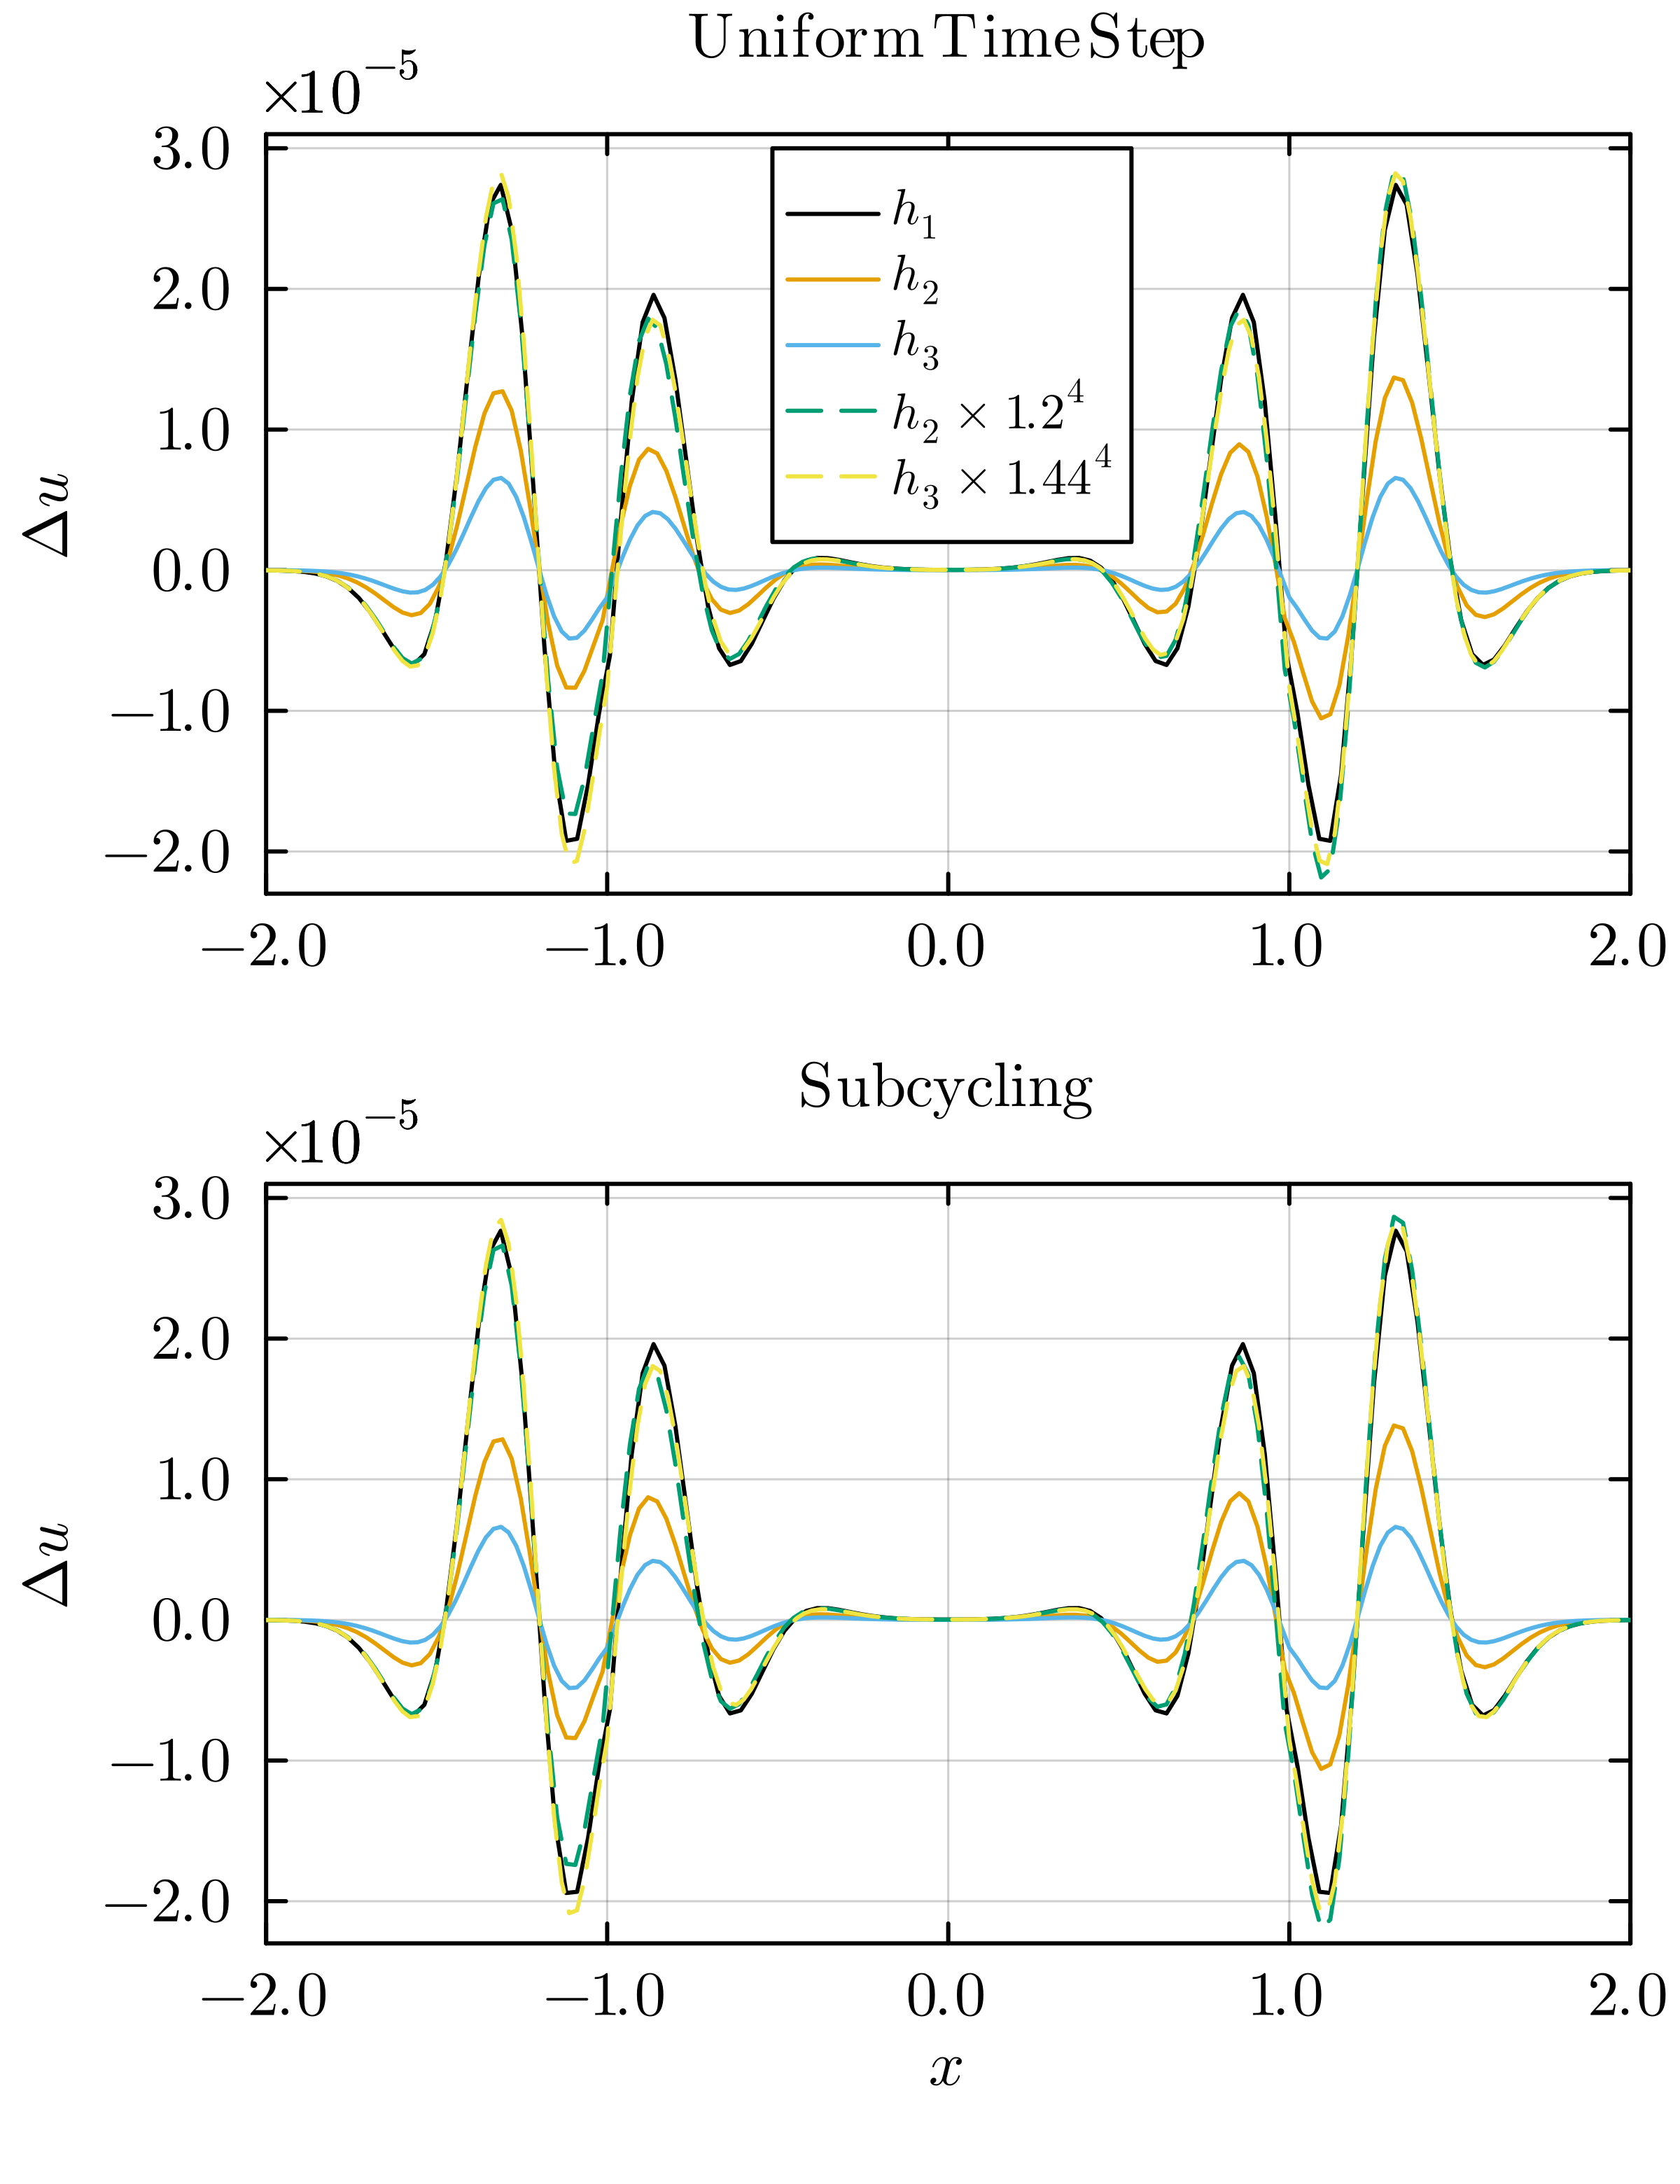

In [10]:
conv_order = 4
conv_bases = [1, 1.2, 1.44]
plts = []
let l=0, t=1.0, dirss,
    dirss = [
        [
            ("gaussian_250-noSC_r0000/gaussian_250-noSC/", "low"),
            ("gaussian_300-noSC_r0000/gaussian_300-noSC/", "med"),
            ("gaussian_360-noSC_r0000/gaussian_360-noSC/", "high"),
        ],
        [
            ("gaussian_250_r0000/gaussian_250/", "low"),
            ("gaussian_300_r0000/gaussian_300/", "med"),
            ("gaussian_360_r0000/gaussian_360/", "high"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/2levels",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        plt = plot!(ylim=(-2.3e-5, 3.1e-5))
        plt = plot!(xlim=(-2,2))
        plt = plot!(legend_position=(0.46, 0.895))
        xs = [-2.0, -1.0, 0.0, 1.0, 2.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])
        plt = (j==1) ? plot!(title=L"\mathrm{Uniform\, Time\, Step}") : plot!(title=L"\mathrm{Subcycling}", xlabel=L"x")
        
        labs = [L"h_1", L"h_2", L"h_3"]
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], linewidth=1, framestyle=:box, label=lab, ylabel=L"\Delta u")
            plt = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e5, digits=1))"), topmargin=0.1cm)
            plt = annotate!(-2, (3.1e-5)*1.12, Plots.text(L"\times10^{-5}", 10, :black, :left))
        end
        
        scalelabs = [L"h_2\times 1.2^4", L"h_3\times 1.44^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * (conv_bases[i+1]^conv_order), linewidth=1, linestyle=:dash, label=lab)
        end
        
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(2,1), size=(400, 520), dpi=600)
# savefig(plot_grid, "ScalarWave-errors.pdf")
display(plot_grid)